# Basic networks

In [3]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import load_data as cf

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# Load data
G = cf.load_seventh_grader_network()

In [5]:
# Nodes - students and edge - left student picked right side one
len(G.nodes())

29

In [6]:
# Students
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [7]:
# Edges list
G.edges()

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 1), (2, 16), (2, 17), (2, 3), (2, 4), (2, 18), (2, 5), (2, 19), (2, 6), (2, 8), (2, 20), (2, 9), (2, 11), (2, 21), (2, 12), (3, 1), (3, 2), (3, 4), (3, 5), (3, 19), (3, 6), (3, 8), (3, 20), (3, 9), (3, 11), (3, 21), (3, 12), (3, 13), (3, 23), (3, 15), (3, 24), (3, 25), (4, 1), (4, 2), (4, 16), (4, 17), (4, 3), (4, 18), (4, 5), (4, 19), (4, 6), (4, 7), (4, 8), (4, 20), (4, 9), (4, 10), (4, 11), (4, 21), (4, 12), (4, 13), (4, 23), (4, 26), (4, 14), (4, 15), (4, 25), (5, 1), (5, 2), (5, 16), (5, 17), (5, 3), (5, 4), (5, 18), (5, 19), (5, 6), (5, 7), (5, 27), (5, 8), (5, 20), (5, 9), (5, 10), (5, 28), (5, 11), (5, 21), (5, 12), (5, 13), (5, 23), (5, 26), (5, 29), (5, 14), (5, 15), (5, 24), (5, 25), (6, 1), (6, 2), (6, 16), (6, 17), (6, 3), (6, 4), (6, 18), (6, 5), (6, 19), (6, 7), (6, 27), (6, 8), (6, 20), (6, 9), (6, 10), (6, 28), (6, 11), (6, 21), (6, 12)

In [8]:
len(G.edges())

376

In [9]:
# Meta data
G.nodes(data = True)

NodeDataView({1: {'gender': 'male'}, 2: {'gender': 'male'}, 3: {'gender': 'male'}, 4: {'gender': 'male'}, 5: {'gender': 'male'}, 6: {'gender': 'male'}, 7: {'gender': 'male'}, 8: {'gender': 'female'}, 9: {'gender': 'female'}, 10: {'gender': 'female'}, 11: {'gender': 'female'}, 12: {'gender': 'female'}, 13: {'gender': 'female'}, 14: {'gender': 'female'}, 15: {'gender': 'female'}, 16: {'gender': 'male'}, 17: {'gender': 'male'}, 18: {'gender': 'male'}, 19: {'gender': 'male'}, 20: {'gender': 'female'}, 21: {'gender': 'female'}, 22: {'gender': 'male'}, 23: {'gender': 'female'}, 24: {'gender': 'female'}, 25: {'gender': 'female'}, 26: {'gender': 'female'}, 27: {'gender': 'female'}, 28: {'gender': 'female'}, 29: {'gender': 'female'}})

In [10]:
# Count number of male and female students
from collections import Counter

Counter([d['gender'] for n,d in G.nodes(data = True)])

Counter({'male': 12, 'female': 17})

In [11]:
# Meta data of edges
list(G.edges(data = True))[0:5] #<- number of students left student indicate right as their favorite

[(1, 2, {'count': 1}),
 (1, 3, {'count': 1}),
 (1, 4, {'count': 2}),
 (1, 5, {'count': 2}),
 (1, 6, {'count': 3})]

In [12]:
count = [d['count'] for n1, n2, d in G.edges(data = True)]
max(count)

3

In [13]:
# Adding nodes and edges pair
G.add_node(30, gender = 'male')
G.add_node(31, gender = 'female')
G.add_edge(30, 31, count = 3)
G.add_edge(31, 30, count = 3)
G.add_edge(7, 30, count = 3)
G.add_edge(7, 31, count = 3)
G.add_edge(30, 7, count = 3)
G.add_edge(31, 7, count = 3)

In [14]:
unrequitted_friendship = []

for n1, n2 in G.edges():
    if not G.has_edge(n2, n1):
        unrequitted_friendship.append((n1,n2))

In [15]:
unrequitted_friendship[0:5]

[(1, 8), (1, 11), (1, 13), (1, 14), (1, 15)]

## Drawing graphs

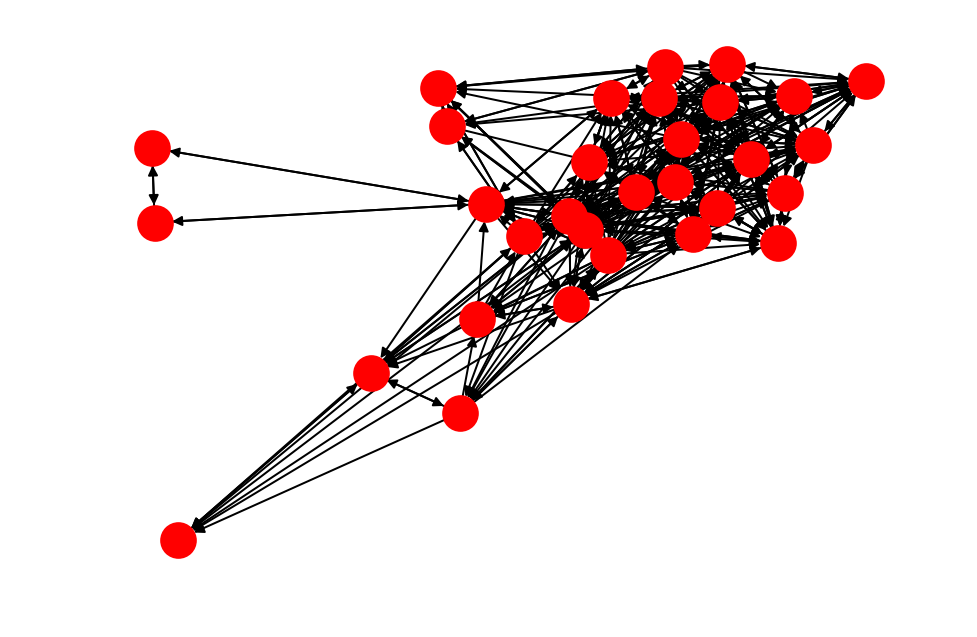

In [16]:
nx.draw(G)

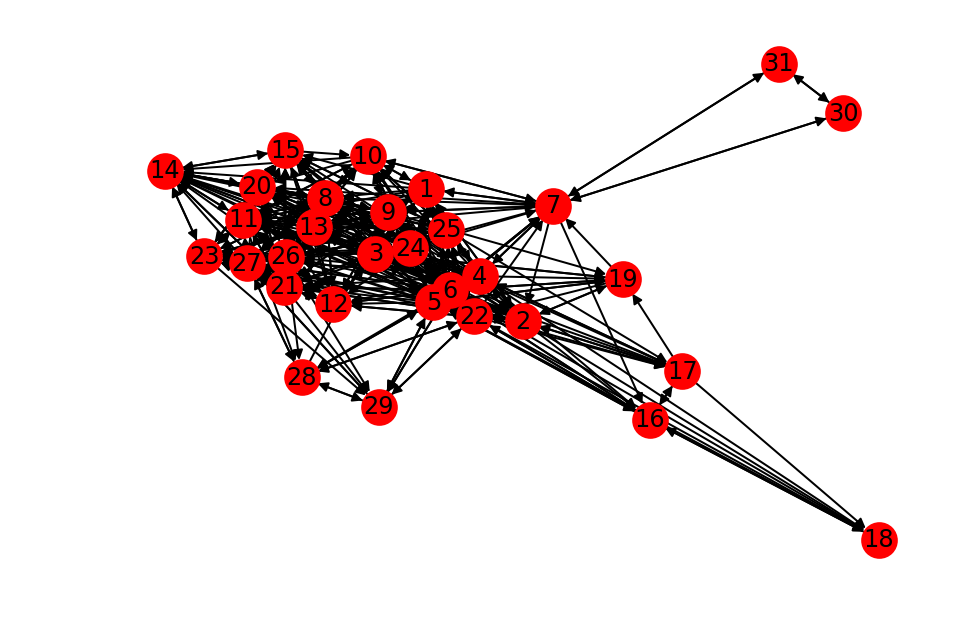

In [17]:
nx.draw(G, with_labels = True)

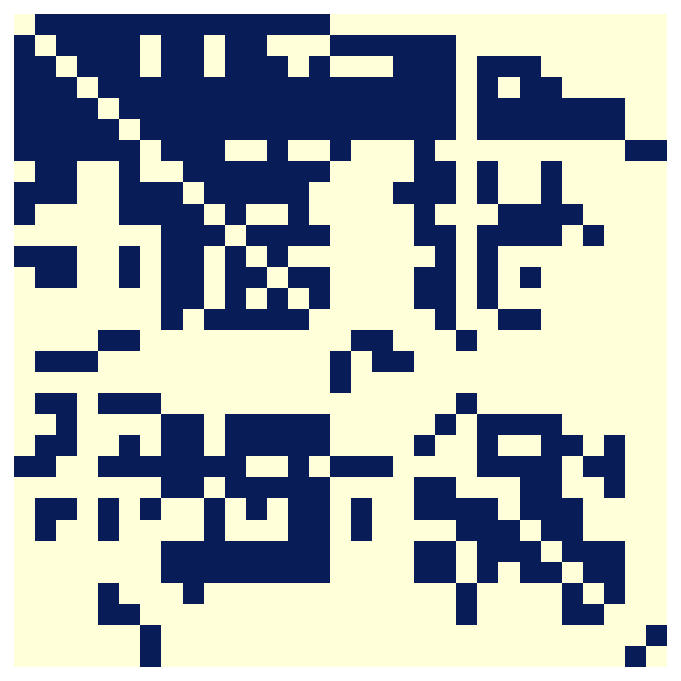

In [18]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

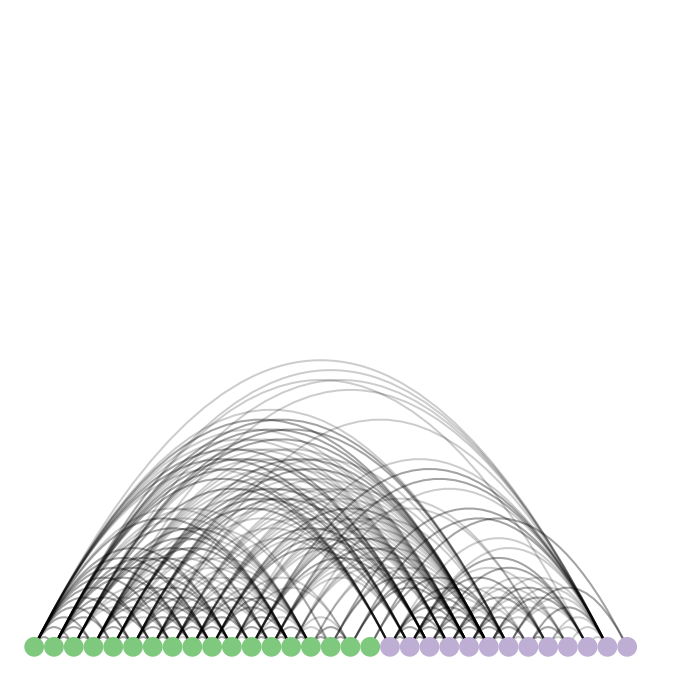

In [21]:
from nxviz import ArcPlot

a = ArcPlot(G, node_color = 'gender', node_grouping = 'gender')
a.draw()

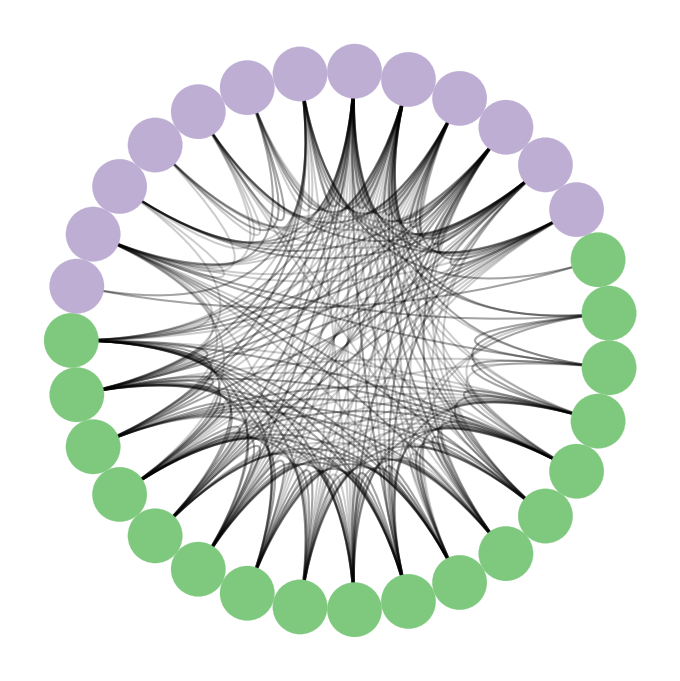

In [22]:
from nxviz import CircosPlot

c = CircosPlot(G, node_color = 'gender', node_grouping = 'gender')
c.draw()